Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("D:/Srikanth/Upgrad/Melanoma_Assignment/Train")
data_dir_test = pathlib.Path('D:/Srikanth/Upgrad/Melanoma_Assignment/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_train, 
    labels='inferred', 
    label_mode='categorical',
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds =  keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred', 
    label_mode='categorical',
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

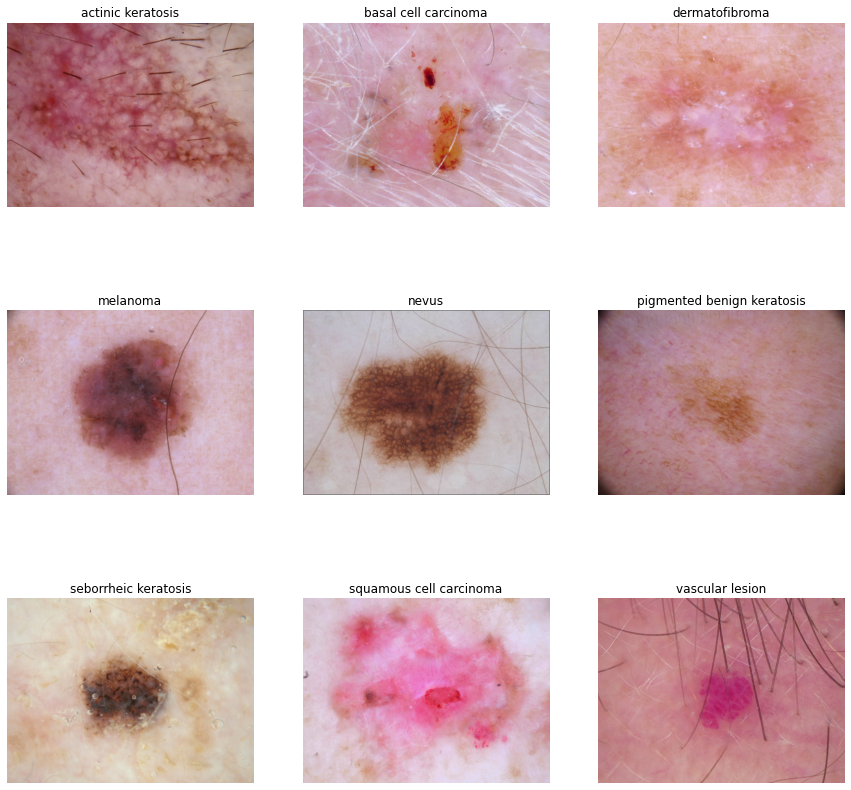

In [11]:
### Visualize one image from each of the sub classes from the training data.
num=0
plt.figure(figsize=[15,15])
for dirpath, dirnames, filenames in os.walk(str(data_dir_train)):
    for filename in [file for file in filenames if file.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).replace("\\", '/').split("/")[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [14]:
### Your code goes here
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255.),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.14),   
    Dense(9, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [15]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 72s 1s/step - loss: 2.0621 - accuracy: 0.2121 - val_loss: 2.0708 - val_accuracy: 0.2886
Epoch 2/20
56/56 [==============================] - 62s 1s/step - loss: 2.0193 - accuracy: 0.2266 - val_loss: 2.0429 - val_accuracy: 0.2841
Epoch 3/20
56/56 [==============================] - 64s 1s/step - loss: 1.9940 - accuracy: 0.2595 - val_loss: 2.0607 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 66s 1s/step - loss: 1.9774 - accuracy: 0.2818 - val_loss: 2.0286 - val_accuracy: 0.2819
Epoch 5/20
56/56 [==============================] - 73s 1s/step - loss: 1.9484 - accuracy: 0.2773 - val_loss: 2.0312 - val_accuracy: 0.1924
Epoch 6/20
56/56 [==============================] - 102s 2s/step - loss: 1.9020 - accuracy: 0.3025 - val_loss: 1.9670 - val_accuracy: 0.2081
Epoch 7/20
56/56 [==============================] - 87s 2s/step - loss: 1.8799 - accuracy: 0.3092 - val_loss: 1.8751 - val_accuracy: 0.3557
Epoch 8/20
56/56 [=

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

### Visualizing training results

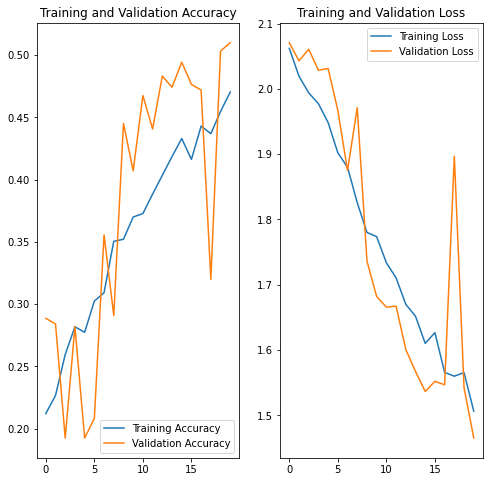

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

1. The traiing accuracy is a bit lower than the validation accuracy after the 20th epoch.
2. It might refer to underfitting

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation=tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

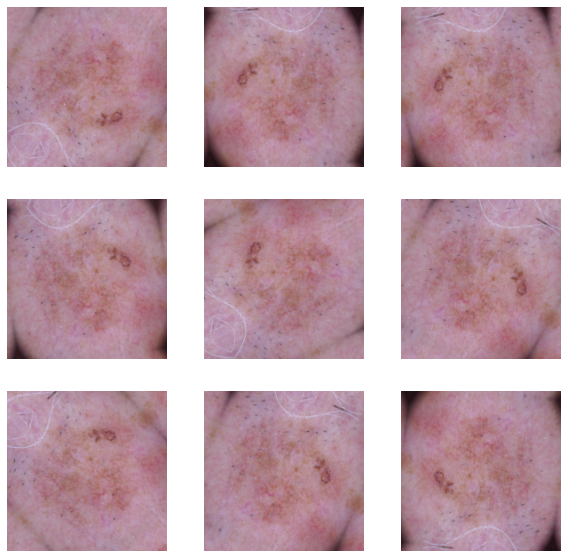

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])


### Compiling the model

In [22]:
## Your code goes here
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 203s 4s/step - loss: 2.0818 - accuracy: 0.1847 - val_loss: 2.0243 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 190s 3s/step - loss: 2.0386 - accuracy: 0.2126 - val_loss: 2.0266 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 193s 3s/step - loss: 2.0199 - accuracy: 0.2031 - val_loss: 1.9870 - val_accuracy: 0.2349
Epoch 4/20
56/56 [==============================] - 194s 3s/step - loss: 1.9846 - accuracy: 0.2344 - val_loss: 2.0289 - val_accuracy: 0.2036
Epoch 5/20
56/56 [==============================] - 194s 3s/step - loss: 2.0464 - accuracy: 0.2176 - val_loss: 1.9977 - val_accuracy: 0.2327
Epoch 6/20
56/56 [==============================] - 194s 3s/step - loss: 1.9444 - accuracy: 0.2612 - val_loss: 1.8464 - val_accuracy: 0.3177
Epoch 7/20
56/56 [==============================] - 194s 3s/step - loss: 1.9217 - accuracy: 0.2840 - val_loss: 1.8286 - val_accuracy: 0.3177
Epoch 8/20
56

### Visualizing the results

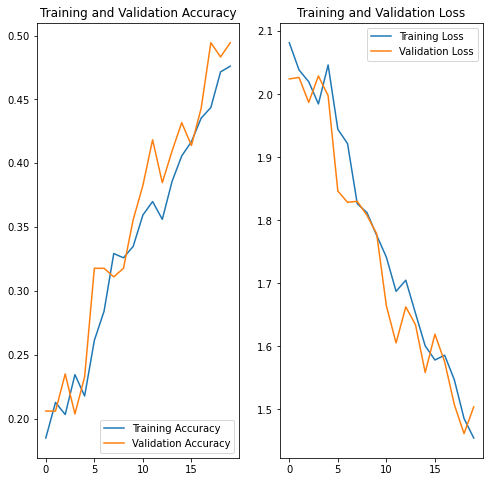

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run.

1. The training accuracy has increased
2. With the augmentation, the validation accuracy is almost similar to the training accuracy.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [34]:
data_dir_train.imfo

AttributeError: 'WindowsPath' object has no attribute 'imfo'

In [38]:
for dirpath, dirnames, filenames in os.walk(str(data_dir_train)):
    if len(list(pathlib.Path(dirpath).glob('*.jpg'))) != 0:
        class_directory = pathlib.Path(dirpath)
        length=len(list(class_directory.glob('*.jpg')))
        print(f'{dirpath} has {length} samples.')


D:\Srikanth\Upgrad\Melanoma_Assignment\Train\actinic keratosis has 114 samples.
D:\Srikanth\Upgrad\Melanoma_Assignment\Train\basal cell carcinoma has 376 samples.
D:\Srikanth\Upgrad\Melanoma_Assignment\Train\dermatofibroma has 95 samples.
D:\Srikanth\Upgrad\Melanoma_Assignment\Train\melanoma has 438 samples.
D:\Srikanth\Upgrad\Melanoma_Assignment\Train\nevus has 357 samples.
D:\Srikanth\Upgrad\Melanoma_Assignment\Train\pigmented benign keratosis has 462 samples.
D:\Srikanth\Upgrad\Melanoma_Assignment\Train\seborrheic keratosis has 77 samples.
D:\Srikanth\Upgrad\Melanoma_Assignment\Train\squamous cell carcinoma has 181 samples.
D:\Srikanth\Upgrad\Melanoma_Assignment\Train\vascular lesion has 139 samples.


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis and melanoma

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [39]:
path_to_training_dataset=data_dir_train
import Augmentor
for dirpath, dirnames, filenames in os.walk(str(data_dir_train)):
    if len(list(pathlib.Path(dirpath).glob('*.jpg'))) != 0:
        p = Augmentor.Pipeline(dirpath)
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to D:\Srikanth\Upgrad\Melanoma_Assignment\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2CB8A181B80>: 100%|██████████| 500/500 [00:05<00:00, 93.19 Samples/s]                   


Initialised with 376 image(s) found.
Output directory set to D:\Srikanth\Upgrad\Melanoma_Assignment\Train\basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2CB87CC7C40>: 100%|██████████| 500/500 [00:05<00:00, 85.68 Samples/s] 


Initialised with 95 image(s) found.
Output directory set to D:\Srikanth\Upgrad\Melanoma_Assignment\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2CB8A1A8550>: 100%|██████████| 500/500 [00:05<00:00, 83.90 Samples/s]                   


Initialised with 438 image(s) found.
Output directory set to D:\Srikanth\Upgrad\Melanoma_Assignment\Train\melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x2CB881ACA00>: 100%|██████████| 500/500 [00:34<00:00, 14.65 Samples/s]


Initialised with 357 image(s) found.
Output directory set to D:\Srikanth\Upgrad\Melanoma_Assignment\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=3008x2000 at 0x2CBFC632970>: 100%|██████████| 500/500 [00:32<00:00, 15.53 Samples/s]                  


Initialised with 462 image(s) found.
Output directory set to D:\Srikanth\Upgrad\Melanoma_Assignment\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2CB871E47C0>: 100%|██████████| 500/500 [00:06<00:00, 72.37 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to D:\Srikanth\Upgrad\Melanoma_Assignment\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2CB872E8B80>: 100%|██████████| 500/500 [00:15<00:00, 31.31 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to D:\Srikanth\Upgrad\Melanoma_Assignment\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2CB87CB4FA0>: 100%|██████████| 500/500 [00:06<00:00, 74.90 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to D:\Srikanth\Upgrad\Melanoma_Assignment\Train\vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2CB8A18D700>: 100%|██████████| 500/500 [00:06<00:00, 75.23 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [40]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [47]:
from glob import glob


path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['D:\\Srikanth\\Upgrad\\Melanoma_Assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_17f8d815-f4f7-40f3-b628-3aa2d9c91107.jpg',
 'D:\\Srikanth\\Upgrad\\Melanoma_Assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_1bb83b9f-9fab-420a-961f-5dda27bf46c9.jpg',
 'D:\\Srikanth\\Upgrad\\Melanoma_Assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_85f6726a-57b6-4bd9-b71d-4ce5abb4d5ee.jpg',
 'D:\\Srikanth\\Upgrad\\Melanoma_Assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_8a350562-75f4-41e3-aa8a-f26aa04ef15a.jpg',
 'D:\\Srikanth\\Upgrad\\Melanoma_Assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_e3b4246e-252b-4019-8755-abe43399f4bb.jpg',
 'D:\\Srikanth\\Upgrad\\Melanoma_Assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_f4862528-d672-4a5c-9f9e-114bd3fe00e9.jpg',
 'D:

In [48]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [49]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [50]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [51]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [52]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [53]:
# data_dir_train=pathlib.Path("D:/Srikanth/Upgrad/Melanoma_Assignment/Train/*.*/Output")
train_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels='inferred', 
  label_mode='categorical',
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [54]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  labels='inferred', 
  label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [55]:
## your code goes here
model_final=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [56]:
## your code goes here
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

#### **Todo:**  Train your model

In [57]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 196s 1s/step - loss: 2.2353 - accuracy: 0.2634 - val_loss: 1.7035 - val_accuracy: 0.4053
Epoch 2/30
169/169 [==============================] - 204s 1s/step - loss: 1.5652 - accuracy: 0.4039 - val_loss: 1.5093 - val_accuracy: 0.4454
Epoch 3/30
169/169 [==============================] - 210s 1s/step - loss: 1.3942 - accuracy: 0.4707 - val_loss: 1.3282 - val_accuracy: 0.5108
Epoch 4/30
169/169 [==============================] - 182s 1s/step - loss: 1.2294 - accuracy: 0.5352 - val_loss: 1.1452 - val_accuracy: 0.5813
Epoch 5/30
169/169 [==============================] - 176s 1s/step - loss: 1.0850 - accuracy: 0.6007 - val_loss: 1.0801 - val_accuracy: 0.6050
Epoch 6/30
169/169 [==============================] - 185s 1s/step - loss: 1.0124 - accuracy: 0.6320 - val_loss: 1.0621 - val_accuracy: 0.6333
Epoch 7/30
169/169 [==============================] - 194s 1s/step - loss: 0.8732 - accuracy: 0.6830 - val_loss: 0.9639 - val_accuracy: 0.6444

#### **Todo:**  Visualize the model results

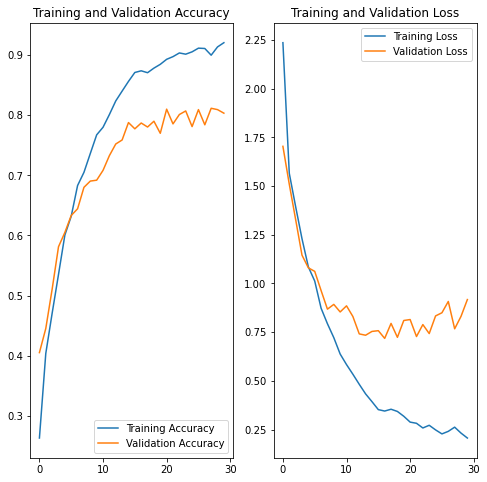

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

The underfitting was overcome and the training accuracy also increased greatly.